# Importing Libraries

In [ ]:
# Importing needed libraries
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Capstone/MBA_Data/

/content/drive/MyDrive/Capstone/MBA_Data


Now we check the number of columns present in the dataset to aid in column header assignment

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/MBA_Data/Julius_Nyerere_branch.csv', header=None, sep=',', nrows=0)
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 32


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/MBA_Data/west_end_branch.csv', header=None, sep=',', nrows=0)
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 32


Assigning column headers to each column since the dataset does not have any column headers. This will also aid in deleting the unwanted columns

In [ ]:
column_headers = ['D0', 'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','Date',
                    'Till No','Cashier','Tran No','Product No','Product','Barcode','Sales','Qty Sold','D25',
                    'D26','D27','D28','D29','D30','D31']

In [ ]:
# Reading the dataset and adding column headers
df1 = pd.read_csv('/content/drive/MyDrive/Capstone/MBA_Data/Julius_Nyerere_branch.csv',
                 header=None,
                 names = column_headers,
                 sep=",",
                 on_bad_lines='skip',
                 low_memory=False)


In [ ]:
# Reading the dataset and adding column headers
df2 = pd.read_csv('/content/drive/MyDrive/Capstone/MBA_Data/west_end_branch.csv',
                 header=None,
                 names = column_headers,
                 sep=",",
                 on_bad_lines='skip',
                 low_memory=False)

## Data Preprocessing

Deleting all unwated columns and splitting the date column into date and time which would be used later on

In [ ]:
# Deleting unnecessary columns by index
columns_to_delete_indices = ['D0','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14',
                             'D15','D25','D26','D27','D28','D29','D30','D31']

In [ ]:
df1.drop(columns_to_delete_indices, axis=1, inplace=True)

# Spliting the 'Date' column into two separate series
date_series, time_series = df1['Date'].str.split(expand=True)[0], df1['Date'].str.split(expand=True)[1]

# Inserting the 'Time' series as a new column directly after the 'Date' column
df1.insert(loc=df1.columns.get_loc('Date') + 1, column='Time', value=time_series)

# Replacing the 'Date' column with the date_series which contains only the date part
df1['Date'] = date_series

# # Displaying the modified DataFrame
# df1

In [ ]:
df2.drop(columns_to_delete_indices, axis=1, inplace=True)

# Spliting the 'Date' column into two separate series
date_series, time_series = df2['Date'].str.split(expand=True)[0], df2['Date'].str.split(expand=True)[1]

# Inserting the 'Time' series as a new column directly after the 'Date' column
df2.insert(loc=df2.columns.get_loc('Date') + 1, column='Time', value=time_series)

# Replacing the 'Date' column with the date_series which contains only the date part
df2['Date'] = date_series

# # Displaying the modified DataFrame
# df2

Now we save the modified dataset to a csv file to use later in the project

In [ ]:
# Append df2 under df1 without needing a key column
merged_df = pd.concat([df1, df2], ignore_index=True)

# Optional: Display the head of the merged dataframe to verify it looks correct
merged_df.head()


,Date,Time,Till No,Cashier,Tran No,Product No,Product,Barcode,Sales,Qty Sold
0,12/08/2019,06:02:47,4,5009,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.0
1,12/08/2019,06:02:47,4,5009,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.0
2,12/08/2019,06:02:55,8,5030,2,10652,FW PLASTIC BAG,0.000000e+00,0.70,1.0
3,12/08/2019,06:02:55,8,5030,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.0
4,12/08/2019,06:02:55,8,5030,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.0


In [ ]:
df2.tail()

,Date,Time,Till No,Cashier,Tran No,Product No,Product,Barcode,Sales,Qty Sold
1048571,10/4/2019,18:09,9,2104,343,2082,CHIMOMBE UHT FULL CREAM 1L,6.005570e+11,18.7,1.0
1048572,10/4/2019,18:09,9,2104,343,2500,IRVINES LARGE EGGS 6S,6.008010e+11,10.35,1.0
1048573,10/4/2019,18:09,9,2104,343,10672,KNORR AROMAT CHEESE CANISTER 75G,6.001090e+11,13.45,1.0
1048574,10/4/2019,18:09,9,2104,343,1969,KEFALOS YOGHURT BANANA 150G,6.009650e+11,7.35,1.0
1048575,10/4/2019,18:09,9,2104,343,10652,FW PLASTIC BAG,0.000000e+00,0.95,1.0


In [ ]:
merged_df.tail()

,Date,Time,Till No,Cashier,Tran No,Product No,Product,Barcode,Sales,Qty Sold
2499251,10/4/2019,18:09,9,2104,343,2082,CHIMOMBE UHT FULL CREAM 1L,6.005570e+11,18.7,1.0
2499252,10/4/2019,18:09,9,2104,343,2500,IRVINES LARGE EGGS 6S,6.008010e+11,10.35,1.0
2499253,10/4/2019,18:09,9,2104,343,10672,KNORR AROMAT CHEESE CANISTER 75G,6.001090e+11,13.45,1.0
2499254,10/4/2019,18:09,9,2104,343,1969,KEFALOS YOGHURT BANANA 150G,6.009650e+11,7.35,1.0
2499255,10/4/2019,18:09,9,2104,343,10652,FW PLASTIC BAG,0.000000e+00,0.95,1.0


From above, we can see that the datasets have been merged correctly because the `df2.tail()` is the same as `merged_df.tail()`

Checking for missing values

In [ ]:
merged_df.isnull().sum()

,0
Date,0
Time,0
Till No,0
Cashier,0
Tran No,0
Product No,0
Product,0
Barcode,0
Sales,0
Qty Sold,0


We can see that there are no missing values in the columns sellected to be used for this project

Grouping all products by date, time and till number because there is a high possibility that when all three are equal, the products belong to the same customer.

In [ ]:
# Group the DataFrame by 'Date', 'Time', and 'Till No'
grouped = merged_df.groupby(['Date', 'Time', 'Till No'])

# Initialize an empty list to hold the list of products for each group
products_grouped = []

# Iterate over each group
for name, group in grouped:
    # Extract the product column values as a list and add to the main list
    products_grouped.append(group['Product'].tolist())

grouped_df = pd.DataFrame(products_grouped)

In [ ]:
grouped_df.head()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,MIRINDA FRUITY PET 500ML,TWIST BREAD,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,...,None,None,None,None,None,None,None,None,None,None
2,LOBELS PRIME WHITE LOAF,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,EGG SANDWICH EACH,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,LEMON SLICE,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,WILLARDS THINGS 75G,None,...,None,None,None,None,None,None,None,None,None,None


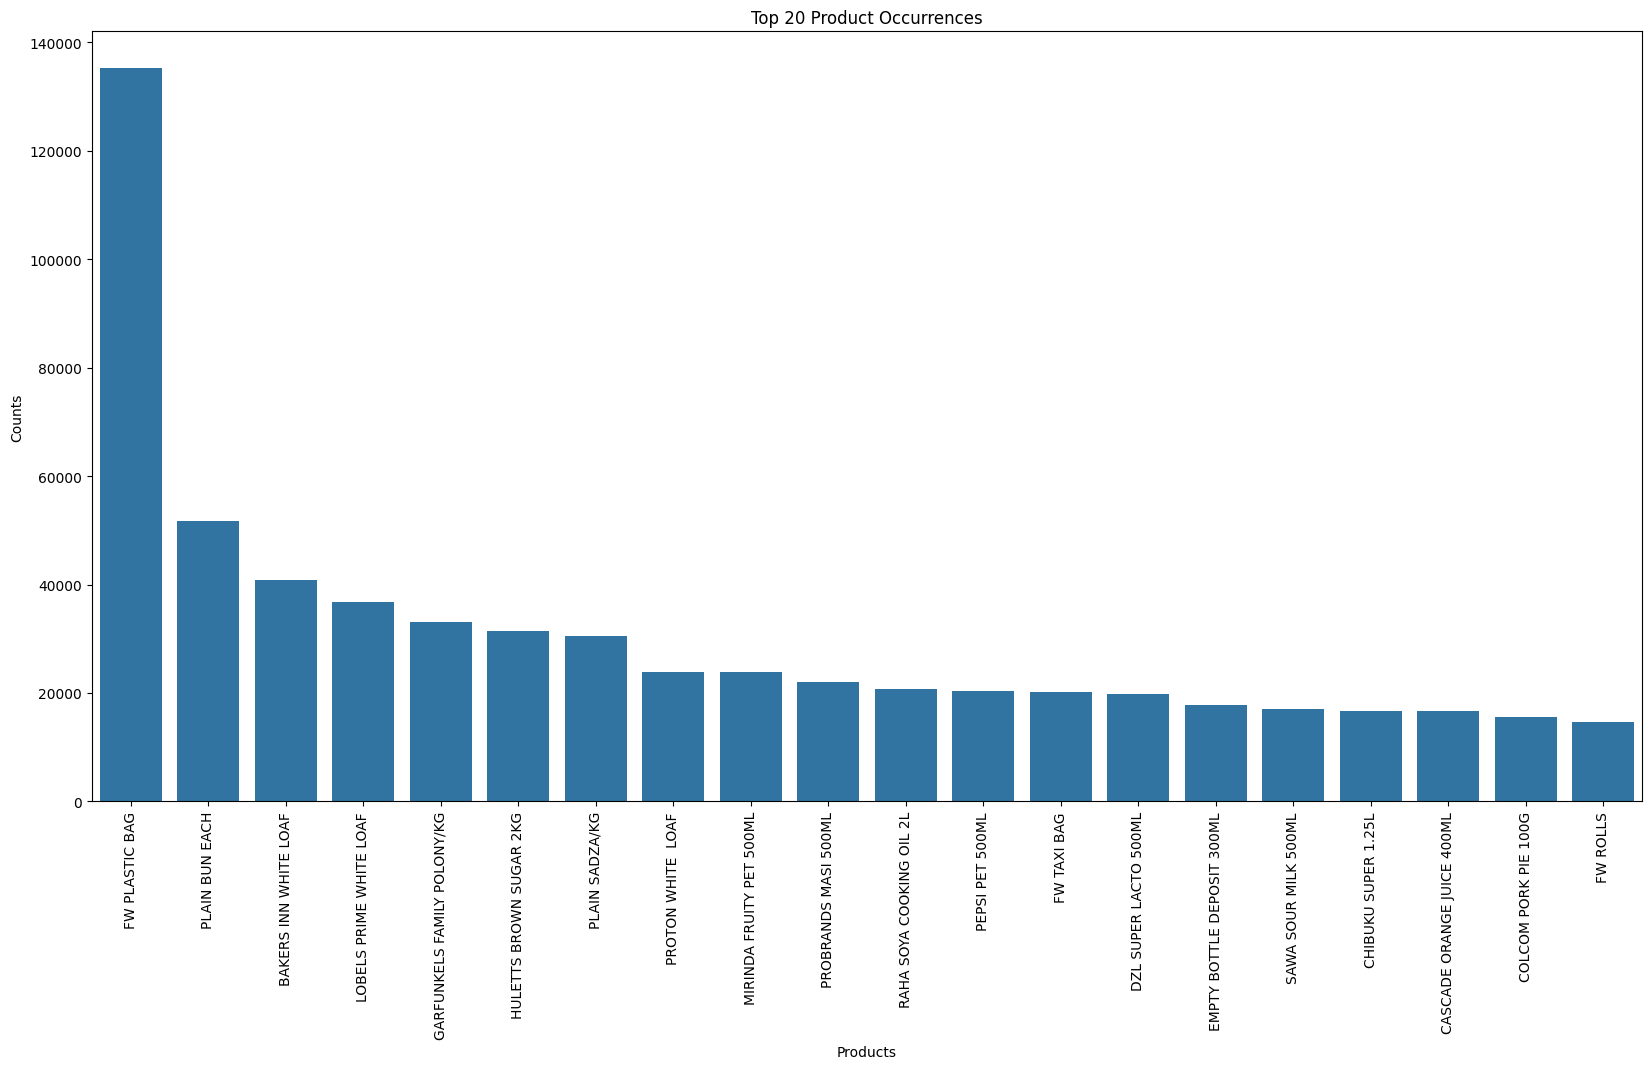

In [ ]:
# Flatten the list of lists to get all product names in a single list
all_products = [product for sublist in products_grouped for product in sublist if len(sublist) > 1]

# Count the occurrences of each product
product_counts = Counter(all_products)

# Select the top 20 most common products for visualization
top_products = product_counts.most_common(20)

# # Prepare data for plotting, using all products
# products, counts = zip(*product_counts.items())

# Prepare data for plotting
products, counts = zip(*top_products)

# Create a larger bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=products, y=counts)

# Add labels and title if needed
plt.xlabel('Products')
plt.ylabel('Counts')
plt.title('Top 20 Product Occurrences')

# Rotate the product names for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


### More data preprocessing

#### We go on to remove the most frequently occuring product in the dataset, that is, fw plastic bag and fw taxi bag. This will make the apriori algorithm more efficient in returning association rules that can actually be used for this project

This removes the products directly from the dataset and deletes all empty rows from the dataset created by the removal of the products

In [ ]:
# # Display initial DataFrame
# print("Initial DataFrame:")
# print(merged_df)

# Items to remove
items_to_remove = ['FW PLASTIC BAG', 'FW TAXI BAG']

# Removing the items
merged_df = merged_df[~merged_df['Product'].isin(items_to_remove)]

# Display the DataFrame after removal
print("\nDataFrame after removing specific items:")
print(merged_df)


DataFrame after removing specific items:
               Date      Time  Till No  Cashier  Tran No  Product No  \
0        12/08/2019  06:02:47        4     5009        2        2041   
1        12/08/2019  06:02:47        4     5009        2        2041   
3        12/08/2019  06:02:55        8     5030        2        2041   
4        12/08/2019  06:02:55        8     5030        2        2041   
5        12/08/2019  06:03:50        4     5009        3        2041   
...             ...       ...      ...      ...      ...         ...   
2499250   10/4/2019     18:09       10     2113      141        2065   
2499251   10/4/2019     18:09        9     2104      343        2082   
2499252   10/4/2019     18:09        9     2104      343        2500   
2499253   10/4/2019     18:09        9     2104      343       10672   
2499254   10/4/2019     18:09        9     2104      343        1969   

                                  Product       Barcode  Sales  Qty Sold  
0                 

In [ ]:
# Write the merged DataFrame to a new CSV file
merged_df.to_csv('Foodworld.csv', index=False)

In [ ]:
# # Group the DataFrame by 'Date', 'Time', and 'Till No'
# grouped = merged_df.groupby(['Date', 'Time', 'Till No'])

# # Initialize an empty list to hold the list of products for each group
# products_grouped = []

# # Iterate over each group
# for name, group in grouped:
#     # Extract the product column values as a list and add to the main list
#     products_grouped.append(group['Product'].tolist())

# grouped_df = pd.DataFrame(products_grouped)

Only run when trying to run clustering algorithm. Takes less RAM to run

In [ ]:
def remove_product(products_grouped, products_to_remove):
    """
    Remove specific products from all transactions.

    :param transactions: A list of transactions (list of lists)
    :param products_to_remove: A list of products to be removed from the transactions
    :return: A new list of transactions with the specified products removed
    """
    # Create a new list of transactions without the specified products
    new_transactions = []
    for transaction in products_grouped:
        # Use a list comprehension to remove the products from the current transaction
        new_transaction = [product for product in transaction if product not in products_to_remove]
        new_transactions.append(new_transaction)

    # Further filter any empty transactions that might result from removal
    new_transactions = [transaction for transaction in new_transactions if transaction]
    return new_transactions

products_to_remove = ['FW PLASTIC BAG', 'FW TAXI BAG']
products_grouped = remove_product(products_grouped, products_to_remove)

Visualising the data to ensure the most frequently bought item is not 'FW PLASTIC BAG' and 'FW TAXI BAG' has been removed

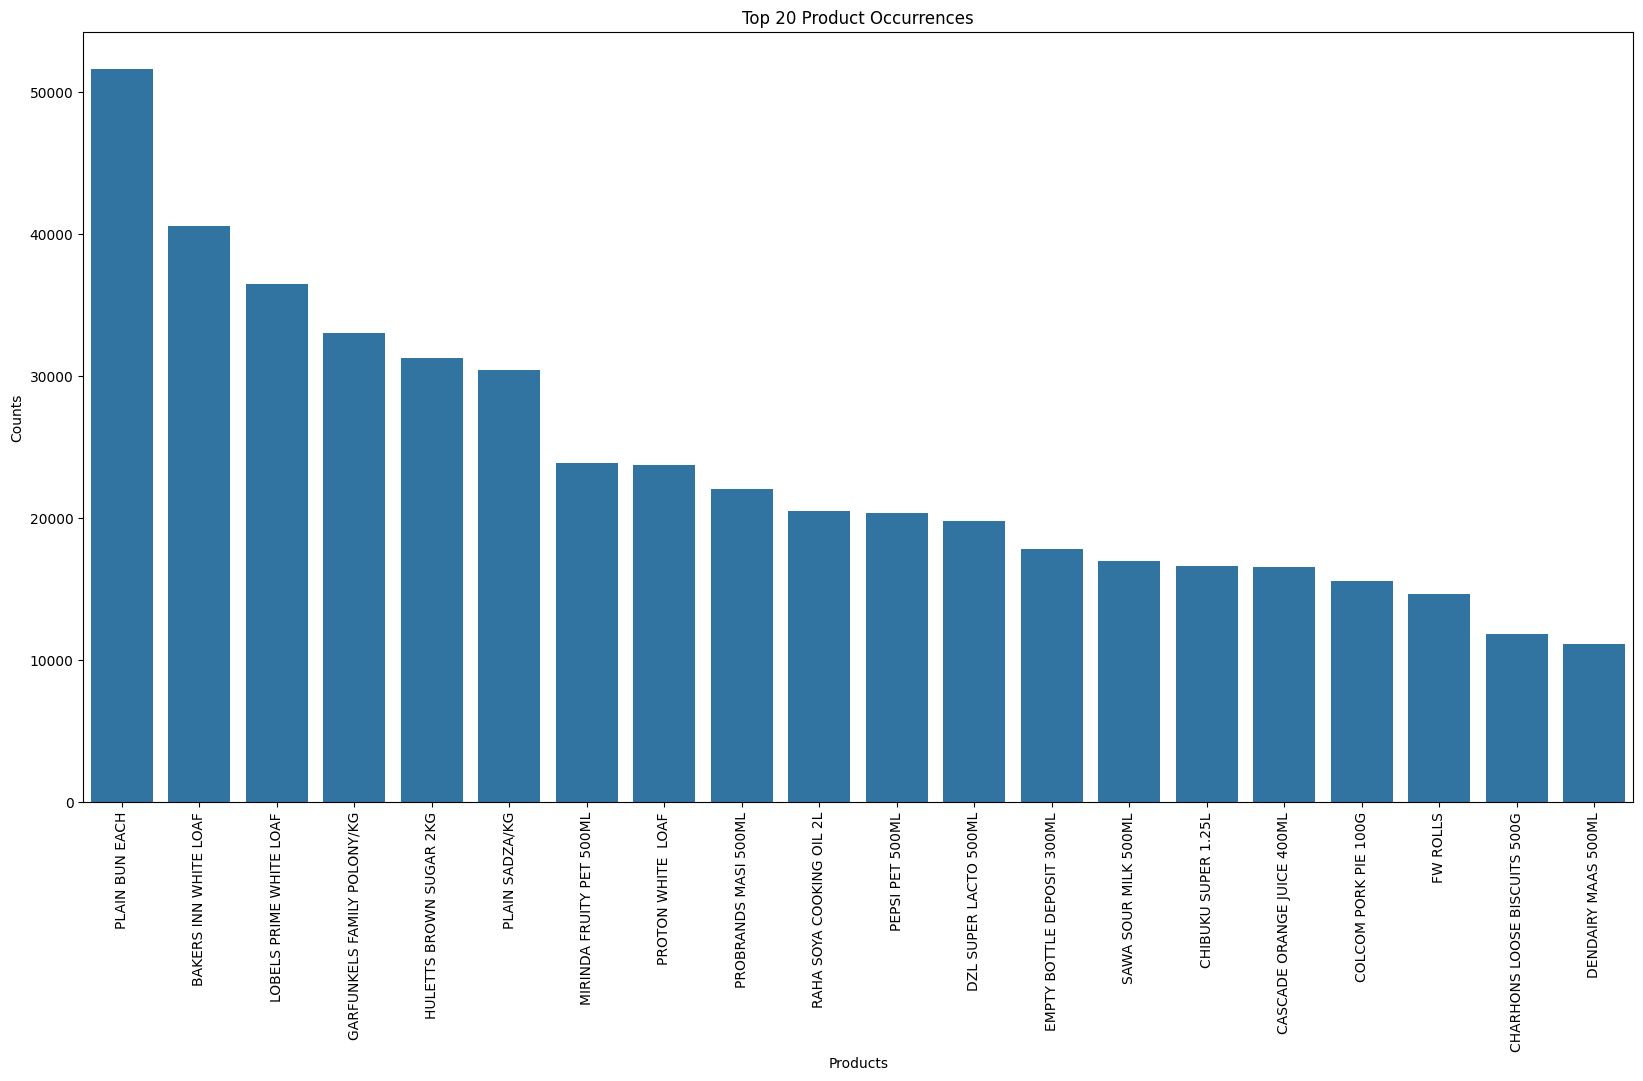

In [ ]:
# Flatten the list of lists to get all product names in a single list
all_products = [product for sublist in products_grouped for product in sublist if len(sublist) > 1]

# Count the occurrences of each product
product_counts = Counter(all_products)

# Select the top 20 most common products for visualization
top_products = product_counts.most_common(20)

# # Prepare data for plotting, using all products
# products, counts = zip(*product_counts.items())

# Prepare data for plotting
products, counts = zip(*top_products)

# Create a larger bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=products, y=counts)

# Add labels and title if needed
plt.xlabel('Products')
plt.ylabel('Counts')
plt.title('Top 20 Product Occurrences')

# Rotate the product names for better readability
plt.xticks(rotation=90)  # Adjust rotation as needed

# Show the plot
plt.show()


<ipython-input-24-c8331e6a7a1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y = merged_df['Product'],


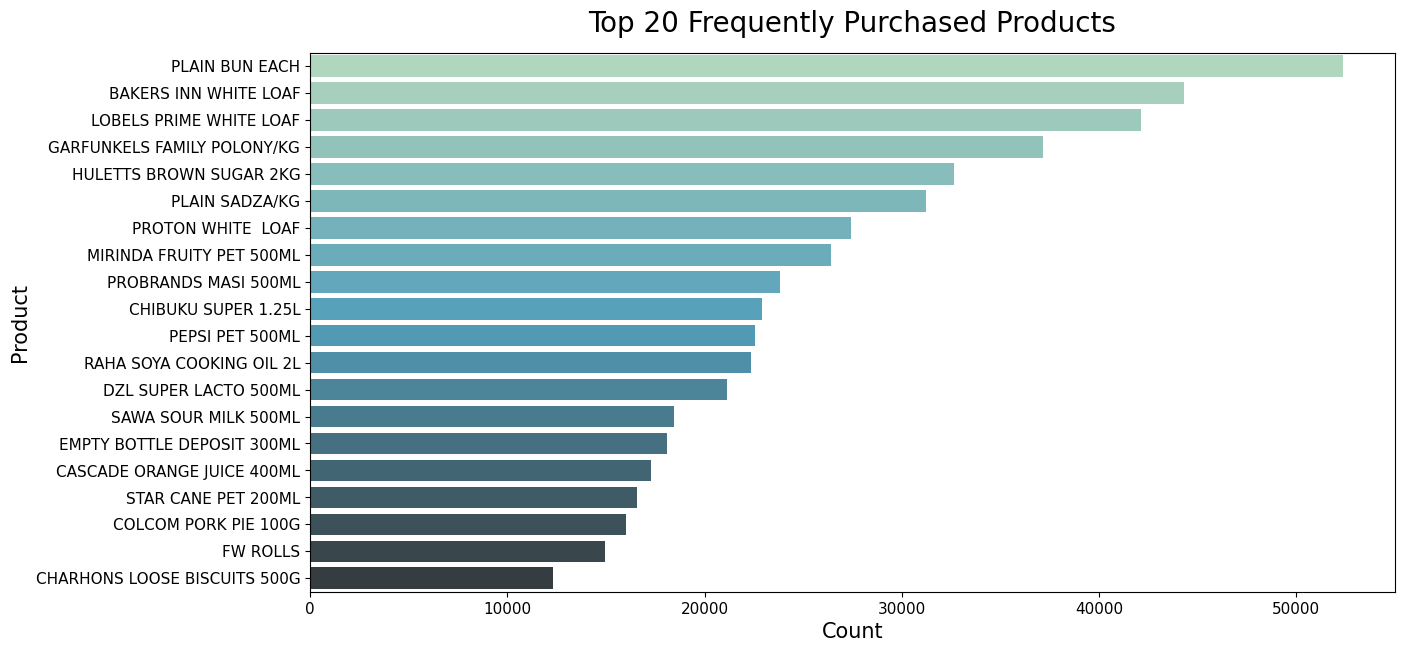

In [ ]:
plt.figure(figsize = (14,7))
ax = sns.countplot(y = merged_df['Product'],
                   order = merged_df["Product"].value_counts().iloc[:20].index,
                   palette = "GnBu_d")
ax.set_title("Top 20 Frequently Purchased Products", size = 20, pad=15)
ax.set_xlabel("Count", size = 15)
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

Checking to see if there are other products that are plastic bags purchased from the supermarket

In [ ]:
# List to hold products that contain 'bag'
products_with_bag = []

# Loop through the list and check for 'bag' in each product name
for product in products_grouped:
    if type(product) == str and 'BAG' in product.lower():
        products_with_bag.append(product)

# Print or use the list of products containing 'bag'
print("Products containing 'bag':", products_with_bag)


Products containing 'bag': []


In [ ]:
grouped_df = pd.DataFrame(products_grouped)

In [ ]:
grouped_df.head()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,MIRINDA FRUITY PET 500ML,TWIST BREAD,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,...,None,None,None,None,None,None,None,None,None,None
2,LOBELS PRIME WHITE LOAF,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,EGG SANDWICH EACH,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,BONAQUA STILL WATER 500ML,LEMON SLICE,LOBELS PRIME WHITE LOAF,LOBELS PRIME WHITE LOAF,WILLARDS THINGS 75G,None,...,None,None,None,None,None,None,None,None,None,None


### Converting to a dataframe in case we might need to use it later

In [ ]:
# Group the DataFrame by 'Date', 'Time', and 'Till No'
grouped = merged_df.groupby(['Date', 'Time', 'Till No'])

# Create an empty list to store the data
products_grouped_dataframe = []

# Iterate over each group
for (date, time, till_no), group in grouped:
    # Extract the products as a list
    products_list = group['Product'].tolist()

    # Append a tuple with the Date, Time, Till No and the products list to the data list
    products_grouped_dataframe.append((date, time, till_no, products_list))

# Create a DataFrame from the list of tuples
updated_grouped_df = pd.DataFrame(products_grouped_dataframe, columns=['Date', 'Time', 'Till No', 'Products'])


In [ ]:
updated_grouped_df

,Date,Time,Till No,Products
0,01/09/2019,06:06:56,10,"[MIRINDA FRUITY PET 500ML, TWIST BREAD]"
1,01/09/2019,06:08:47,5,"[LOBELS PRIME WHITE LOAF, LOBELS PRIME WHITE L..."
2,01/09/2019,06:09:14,10,[LOBELS PRIME WHITE LOAF]
3,01/09/2019,06:09:53,10,[EGG SANDWICH EACH]
4,01/09/2019,06:10:45,1,"[BONAQUA STILL WATER 500ML, BONAQUA STILL WATE..."
...,...,...,...,...
688621,9/9/2019,9:58,6,[BUTTER CREAM BREAKFAST BUNS 6S]
688622,9/9/2019,9:58,9,"[NZUNGU/RAW NUTS/KG, MARINATED ROAST CHICKEN/K..."
688623,9/9/2019,9:58,13,"[COLOURING BOOK ANIMALS, COLOURING BOOK FRUITS..."
688624,9/9/2019,9:59,3,"[RAHA SOYA COOKING OIL 2L, NGWEREWERE 10KG]"


In [ ]:
updated_grouped_df

,Date,Time,Till No,Products
0,01/09/2019,06:06:56,10,"[MIRINDA FRUITY PET 500ML, TWIST BREAD]"
1,01/09/2019,06:08:47,5,"[LOBELS PRIME WHITE LOAF, LOBELS PRIME WHITE L..."
2,01/09/2019,06:09:14,10,[LOBELS PRIME WHITE LOAF]
3,01/09/2019,06:09:53,10,[EGG SANDWICH EACH]
4,01/09/2019,06:10:45,1,"[BONAQUA STILL WATER 500ML, BONAQUA STILL WATE..."
...,...,...,...,...
688621,9/9/2019,9:58,6,[BUTTER CREAM BREAKFAST BUNS 6S]
688622,9/9/2019,9:58,9,"[NZUNGU/RAW NUTS/KG, MARINATED ROAST CHICKEN/K..."
688623,9/9/2019,9:58,13,"[COLOURING BOOK ANIMALS, COLOURING BOOK FRUITS..."
688624,9/9/2019,9:59,3,"[RAHA SOYA COOKING OIL 2L, NGWEREWERE 10KG]"


In [ ]:
!ls

apriori_results.txt    Julius_Nyerere_branch.csv	   west_end_branch.csv
Foodworld.csv	       Julius_Nyerere_branch_grouped.csv   West_End_Sample.csv
Foodworld_grouped.csv  Julius_Nyerere_branch_modified.csv
Foodworld_updated      products_grouped.txt


In [ ]:
# Write the DataFrame to a new CSV file
updated_grouped_df.to_csv('Foodworld_grouped.csv', index=False)

In [ ]:
# Load data from a CSV file
url = 'Foodworld.csv'  # Replace with the path to your dataset
data = pd.read_csv(url)

<ipython-input-32-6fd11dd82037>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [ ]:
data.head()

,Date,Time,Till No,Cashier,Tran No,Product No,Product,Barcode,Sales,Qty Sold
0,12/08/2019,06:02:47,4,5009,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.0,1.0
1,12/08/2019,06:02:47,4,5009,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.0,1.0
2,12/08/2019,06:02:55,8,5030,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.0,1.0
3,12/08/2019,06:02:55,8,5030,2,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.0,1.0
4,12/08/2019,06:03:50,4,5009,3,2041,LOBELS PRIME WHITE LOAF,6.008022e+11,6.0,1.0


In [ ]:
# Extract unique products
unique_products = data['Product'].unique()

# Convert to a list (optional, for better handling or further processing)
unique_products_list = list(unique_products)

# Print the list of unique products
# print(unique_products_list)

# Print the list of unique products
for product in unique_products_list:
    print(product)


In [ ]:
with open('unique_products_list.txt', 'w') as file:
  for product in unique_products_list:
    file.write(product + '\n')

### Running the Apriori Algorithm

In [ ]:
from itertools import combinations

#Creating a list of dictionaries
count = [dict() for x in range(len(grouped_df.values[0])+1)]

#Count support for each individual items
s=[]
for i in products_grouped:
    for j in i:
        s.append(j)
for i in s:
    #If item is present in dictionary, increment its count by 1
    if i in count[1]:
        count[1][i] = count[1][i] + 1
    #If item is not present in dictionary, set its count to 1
    else:
        count[1][i] = 1

for key, value in count[1].items():
    if value == 'nan':
        count[1].pop(key)

In [ ]:
#Parameters
minsup=float(input("Enter Support-Threshold: "))
minsup=minsup*len(grouped_df)
minconf=float(input("Enter Confidence-Threshold: "))

# # Open a text file to write the output
# with open("apriori_results.txt", "a") as f:
#   f.write("Support-Threshold = " + str(minsup) + "\n")
#   f.write("Confidence-Threshold = " + str(minconf) + "\n")

#Remove infrequent and empty items
for i in count[1].copy():
    if(count[1][i]<minsup):
        count[1].pop(i)
#count[1].pop("nan")

#Generate frequent two item sets
slist=[list() for x in range(33)]
a=[]
a=combinations(count[1],2)
for j in a:
    slist[2].append(tuple(sorted(j)))
# slist[2]=list(combinations(count[1],2))
candidates=[]
for i in slist[2]:
    candidates.append(i)
for i in candidates:
    for k in products_grouped:
        f=0
        for l in i:
            if(k.__contains__(l)==0):
                f=1
                break
        if(f==0):
            if i in count[2]:
                count[2][i]=count[2][i]+1
            else:
                count[2][i]=1
for i in count[2].copy():
    if(count[2][i]<minsup):
        count[2].pop(i)

#Generate frequent itemsets of length z from z-1
def freq(z):
    for i in count[z-1]:
        for j in count[z-1]:
            a=set(i)
            b=set(j)
            #Generate z length itemsets from z-1 length frequent itemsets which have z-2 intersection elements
            if(len(a.intersection(b))==z-2):
                #Check if all subsets are in frequent z-1 itemsets, otherwise cannot be frequent
                t=list(combinations(sorted(a.union(b)), z-1))
                c=0
                for n in t:
                    for m in count[z-1]:
                        if((n)==m):
                            c=c+1
                if(c==z):
                    flag=0
                    for h in slist[z]:
                        if(sorted(list(a.union(b)))==sorted(h)):
                            flag=1
                    if(flag==0):
                        slist[z].append(tuple(sorted(list(a.union(b)))))
    #Calculate support
    candidates=[]
    for i in slist[z]:
        candidates.append(tuple(i))
    for i in candidates:
        for k in products_grouped:
            f=0
            for l in i:
                if(k.__contains__(l)==0):
                    f=1
                    break
            #If the complete item is present in the transaction, we increase it's support
            if(f==0):
                #If already present in dictionary then increment by 1
                if i in count[z]:
                    count[z][i]=count[z][i]+1
                #Else add it to dictionary
                else:
                    count[z][i]=1
    for i in count[z].copy():
        if(count[z][i]<minsup):
            count[z].pop(i)

#Call function to generate frequent itemssets
i=3
while(len(count[i-1])!=0):
    freq(i)
    i=i+1
q=i-2

#Function to extract single item set from a tuple
def value(a):
    a=str(a)
    a=a[:-2]
    a=a[2:]
    n=a[:-1]
    return n

#Find maximal and closed itemsets
maximal=[]
closed=[]
for i in range(1,q):
    for j in count[i]:
        fm=0
        fc=0
        for k in count[i+1]:
            a=set(list([j]))
            b=set(list(k))
            #Set is maximal if no immediate superset is frequent
            if(a.intersection(b)==a):
                fm=1
                #Set is closed if none of its immediate supersets have equal support
                if(count[i][j]==count[i+1][k]):
                    fc=1
        if(fm==0):
            maximal.append(j)
        if(fc==0):
            closed.append(j)
#All sets at the top of the tree are automatically maximal and closed
for i in count[q]:
    maximal.append(i)
    closed.append(i)

#Find Association Rules
print("ASSOCIATION RULES")

# # Open a text file to write the output
# with open("apriori_results.txt", "a") as f:
#     f.write("Support-Threshold = " + str(minsup) + "\n")
#     f.write("Confidence-Threshold = " + str(minconf) + "\n")
#     f.write("ASSOCIATION RULES\n")
c=0
ant=count.copy()
for i in range(q,0,-1):
    for j in ant[i]:
        for k in range(i-1,0,-1):
            s=list(combinations(list(j),k))
            #Traverse through list of all combinations of antecedants
            for n in s:
                #Sorting to prevent duplicate itemsets
                r=tuple(sorted(set(j).difference(set(n))))
                l=len(n)
                #Check if len(n)==1 to be able to extract key to search in the support dictionary.
                if(l==1):
                    n=value(n)
                    l=1
                if(len(r)==1):
                    r2=value(r)
                if(n!=None):
                    #If rule's confidence is greater than minconfidence, then print the rule
                    if((ant[len(j)][j]/ant[l][n])>=minconf):
                      #Rule is only significant if it is present in CLOSED, otherwise it is redundant
                        if(closed.__contains__((n))):
                            c=c+1

                            # if len(r) == 1:
                            #   with open("apriori_results.txt", "a") as f:
                            #     f.write(f"{n} ({ant[l][n]}) ---> {r2} ({ant[len(r)][r2]}) confidence = {ant[len(j)][j] / ant[l][n]}\n")
                            # else:
                            #   with open("apriori_results.txt", "a") as f:
                            #     f.write(f"{n} ({ant[l][n]}) ---> {r} ({ant[len(r)][r]}) confidence = {ant[len(j)][j] / ant[l][n]}\n")

                            if(len(r)==1):
                                # with open("apriori_results.txt", "a") as f:
                                #   f.write(print(n,"(",ant[l][n],")","--->",r2,"(",ant[len(r)][r2],")", " confidence = ",(ant[len(j)][j]/ant[l][n])))
                                print(n,"(",ant[l][n],")","--->",r2,"(",ant[len(r)][r2],")", " confidence = ",(ant[len(j)][j]/ant[l][n]))
                            else:
                                # with open("apriori_results.txt", "a") as f:
                                #   f.write(print(n,"(",ant[l][n],")","--->",r,"(",ant[len(r)][r],")", " confidence = ",(ant[len(j)][j]/ant[l][n])))
                                print(n,"(",ant[l][n],")","--->",r,"(",ant[len(r)][r],")", " confidence = ",(ant[len(j)][j]/ant[l][n]))


Enter Support-Threshold: 0.001
Enter Confidence-Threshold: 0.01


### Running the FP Growth Algorithm

In [ ]:
#Parameters
minsup=float(input("Enter Support-Threshold: "))
minsup=minsup*len(grouped_df)
minconf=float(input("Enter Confidence-Threshold: "))

#Creating a list of dictionaries
count = [dict() for x in range(len(grouped_df.values[0])+1)]

#Count support for each individual items
s=[]
for i in products_grouped:
  for j in i:
      s.append(j)
for i in s:
  #If item is present in dictionary, increment its count by 1
  if i in count[1]:
      count[1][i] = count[1][i] + 1
  #If item is not present in dictionary, set its count to 1
  else:
      count[1][i] = 1

#Remove infrequent and empty items
for i in count[1].copy():
  if(count[1][i]<minsup):
      count[1].pop(i)
# count[1].pop('nan')

#Storing transactions as lists without infrequent items
a=list(count[1])
item=[list() for i in range(len(grouped_df))]
c=0
for i in range(0,len(products_grouped)):
  for j in range(len(products_grouped[i])):
      if(a.__contains__(products_grouped[i][j])!=0):
          item[i].append(products_grouped[i][j])

#Function to sort list to support
def sort(a):
  for i in range(len(a)-1):
      for j in range(len(a)-i-1):
          if(count[1][a[j]]<count[1][a[j+1]]):
              a[j],a[j+1]=a[j+1],a[j]

#Call function to sort all transactions in descending order of their support
for i in range(0,len(grouped_df)):
  if(len(item[i])>1):
      sort(item[i])

#Tree class for FP-Tree
class tree:
  def __init__(self, name, sup, parent):
      self.name = name
      self.sup = sup
      self.nodeLink = None
      self.parent = parent
      self.children = []

#Function to check if the node is present is a child of the current node
def ispresent(node,name):
  f=-1
  for i in node.children:
      f=f+1
      if(i.name==name):
          return f
  return -1

#HeaderTable which stores the reference of last/first occurence of an item. Used as a linked list to generate candidate trees
lastocc=count[1].copy()
for i in lastocc:
  lastocc[i]=None

#Function to create FP-tree
root = tree("root",-1,None)
z=0
for i in item:
  current=root
  for j in range(len(i)):
      if(ispresent(current,i[j])>=0):
          current=current.children[ispresent(current,i[j])]
          current.sup=current.sup+1
      else:
          child=tree(i[j],1,current)
          current.children.append(child)
          t=current
          current=current.children[ispresent(current,i[j])]
          current.parent=t
          if(lastocc[current.name]==None):
              lastocc[current.name]=current
          else:
              current.nodeLink=lastocc[current.name]
              lastocc[current.name]=current

#Function to extract single item set from a tuple
def value(a):
  a=str(a)
  a=a[:-2]
  a=a[2:]
  a=a[:-1]
  return a

#Function to get frequent itemsets with suffix 'node' and length n
def singlepath(node,n):
  path=[]
  if node is None or n == 0:
    return

  c=0
  sup=node.sup
  #path=[]
  pathname=[]
  current=node

  #Get the path from current node to root
  while(current.parent!=None):
      path.append(current)
      pathname.append(current.name)
      current=current.parent
  path.remove(node)
  pathname.remove(node.name)
  candidatepath=[]
  temp_candidatepath=[]
  #Generate combinations of length n in the path
  a =(list(combinations(pathname,n)))
  for j in a:
      temp_candidatepath.append(tuple(sorted(j)))
  #Append the suffix 'node.name' to the above paths
  for j in temp_candidatepath:
      j=list(j)
      j.append(node.name)
      candidatepath.append(sorted(j))
  #Update counts of the generated itemsets
  for j in candidatepath:
      j=tuple(j)
      if j in count[n+1]:
          count[n+1][j]=count[n+1][j]+sup
      else:
          count[n+1][j]=sup

  #Iterating in the candidate tree recursively
  if(node.nodeLink!=None):
      node=node.nodeLink
      singlepath(node,n-1) # changed i to (n-1)

#Check if itemset is frequent
def frequent(n):
  f=0
  for i in count[n]:
      if(count[n][i]>=minsup):
          f=1
  if(f==1):
      return 1
  else:
      return 0

#Call singlepath function for all frequent nodes
for i in range(1,len(grouped_df.values[0])+1):
  if(frequent(i)==1):
      for j in lastocc:
          singlepath(lastocc[j],i)
          # i=i+1 # added change

#Remove infrequent itemsets
for z in range(len(grouped_df.values[0])+1):
  for i in count[z].copy():
          if(count[z][i]<minsup):
              count[z].pop(i)

#Get 'q', the length of the longest itemset
i=2
while(len(count[i-1])!=0):
  i=i+1
q=i-2

#Find maximal and closed itemsets
maximal=[]
closed=[]
for i in range(1,q):
  for j in count[i]:
      fm=0
      fc=0
      for k in count[i+1]:
          a=set(list([j]))
          b=set(list(k))
          #Set is maximal if no immediate superset is frequent
          if(a.intersection(b)==a):
              fm=1
              #Set is closed if none of its immediate supersets have equal support
              if(count[i][j]==count[i+1][k]):
                  fc=1
      if(fm==0):
          maximal.append(j)
      if(fc==0):
          closed.append(j)
#All sets at the top of the tree are automatically maximal and closed
for i in count[q]:
  maximal.append(i)
  closed.append(i)

#Find Association Rules
print("ASSOCIATION RULES")
ant=count.copy()
for i in range(q,0,-1):
  for j in ant[i]:
      for k in range(i-1,0,-1):
          s=list(combinations(list(j),k))
          #Traverse through list of all combinations of antecedants
          for n in s:
              #Sorting to prevent duplicate itemsets
              r=tuple(sorted(set(j).difference(set(n))))
              l=len(n)
              #Check if len(n)==1 to be able to extract key to search in the support dictionary.
              if(l==1):
                  n=value(n)
                  l=1
              if(len(r)==1):
                  r2=value(r)
              if(n!=None):
                  #If rule's confidence is greater than minconfidence, then print the rule
                  if((ant[len(j)][j]/ant[l][n])>=minconf):
                      #Rule is only significant if it is present in CLOSED, otherwise it is redundant
                      if(closed.__contains__((n))):
                          c=c+1
                          if(len(r)==1):
                              print(n,"(",ant[l][n],")","--->",r2,"(",ant[len(r)][r2],")", " - conf(",(ant[len(j)][j]/ant[l][n]),")")
                          else:
                              print(n,"(",ant[l][n],")","--->",r,"(",ant[len(r)][r],")", " conf(",(ant[len(j)][j]/ant[l][n]),")")


## Manual NOVA Classification

In [ ]:
# Upload the file
from google.colab import files
uploaded = files.upload()

# Read the file into a DataFrame
file_name = list(uploaded.keys())[0]
#food_list = pd.read_csv(file_name, header=None, names=['Products'], index_col=False)
food_list = pd.read_excel(file_name, header=None, names=['Products'], index_col=False)

Saving food_list_final.xlsx to food_list_final.xlsx


<ipython-input-4-20615fede6bd>:8: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  food_list = pd.read_excel(file_name, header=None, names=['Products'], index_col=False)


In [ ]:
# food_list = pd.read_csv('food_list_final.csv')

In [ ]:
#drop first row inplace
food_list.drop(food_list.index[0], inplace=True)
food_list.head()
# food_list['Products'].str.strip()

,Products
1,proton white burger rolls\t
2,pepsi pet\t
3,inkomaas gold\t
4,mega kapenta\t
5,kefalos double plain yoghurt\t


In [ ]:
# Function to remove trailing tabs
def remove_trailing_tab(text):
    if isinstance(text, str):  # Ensure the cell is a string
        return re.sub(r'\t$', '', text)
    return text

# Apply the function to each cell in the DataFrame
food_list = food_list.applymap(remove_trailing_tab)

food_list.head(20)

,Products
1,proton white burger rolls
2,pepsi pet
3,inkomaas gold
4,mega kapenta
5,kefalos double plain yoghurt
6,ceres white grape bottle
7,inkomaas bottle
8,sweet potatoes
9,fruitree 20% guava
10,cheeky chilli peri peri sauce


In [ ]:
# Categorize products based on keywords and known product types
def categorize_product(product):
    product_lower = product.lower()

    # Checking keywords to classify the products
    if any(keyword in product_lower for keyword in ["frozen", "instant", "packaged", "snack", "soda", "fanta", "coke", "sprite", "mirinda", "pepsi", "7 up", "cake", "gateaux", "yoghurt", "yog",
                                                      "ice cream", "cone", "mello", "cadbury", "cola", "sting", "quench", "pascal", "biscuit", "biscuits", "bisc", "maputi", "skippy", "yogie", "dzl",
                                                      "fruitree", "squishsquash", "squish squash", "sausage", "sausages", "cookies", "whisky", "gin", "rum", "vodka", "carimba", "lyons", "periperi",
                                                      "peanut butter", "p/butter", "fun n fresh", "gum", "spearmint", "mints", "mint", "chips", "maheu", "pudding", "giggles", "nibble", "spice", "cream",
                                                      "colcom", "polony", "salad dressing", "salad cream", "arenel", "nestle", "lays", "spuds", "things", "schweppes", "seltzer", "lobels", "ls", "snack",
                                                      "popcorn", "noodles", "noodle", "porridge", "pudding", "instant", "king", "rings", "royco", "jelly", "kelloggs", "nibble hearts", "lakker", "tiggle",
                                                      "tomato sauce", "simba", "chompkins", "kefalos", "stimorol", "juice", "ceres", "fresh cream", "fresh co butternut cubes", "12inch rect fresh cream",
                                                      "short bread", "smirnoff", "tart", "doughnut", "scone", "croissant", "pie", "fresh cream long doughnut", "moirs caramel essence", "custard", "choc",
                                                      "mixed portions", "soft drink", "hunters dry nrb", "pure seasons paprika jar", "chilli power", "citro tropical", "mazoe", "calcutta", "ladismith",
                                                      "sparletta cherry plum can", "pure stir fry mix refill", "deli boerwors", "braai", "willards", "syrup", "whiskey", "season", "spaghetti",
                                                      "macaroni", "black forest", "irvines", "spirit", "all joy sweet chilli hot", "ketchup", "f/seasons", "f/seasons", "seasons", "birds", "tropika",
                                                      "herb", "crystal", "dairy burst tropical", "muffins", "flavor raver", "nutriplus", "cascade", "brandy", "russian bear energy fusion", "essence",
                                                      "barcadi breezer", "karinga", "chadskill", "garlic powder", "garfunkels", "seasoning", "madeira", "dendairy", "bally house", "chipsy crinkles",
                                                      "knorr", "country choice", "premier plus", "toffee", "optus", "f/seasons chicken spice", "salad cream", "jam", "marmalade", "margarine", "spread",
                                                      "charhons", "surrey", "baked beans", "lobels", "limpopo", "butter cream", "knorr", "energade", "energy drink", "kershelmar", "cheezies", "tacoola",
                                                      "burger", "richs versatie", "short bread", "spar-letta", "snacks", "mr brands", "purity", "rajah", "energy", "crushed garlic & chilli", "purejoy",
                                                      "melrose", "robertson", "novida", "saltine", "penne", "curry powder", "super sip", "beacon", "black label", "chippers", "pagomo", "spar", "chibuku",
                                                      "infacare", "value mince", "lemon &condensed", "cheeky", "madras", "kinder joy", "brono", "dandy"]):
        return 'Ultra-Processed Foods'

    elif any(keyword in product_lower for keyword in ["fresh", "raw", "whole", "uncooked", "loose", "inkomaas", "chicken", "ox", "goat", "beef", "pork", "steak", "salad", "sweet potatoes",
                                                    "rice", "rib", "kg", "tea", "coffee", "water", "rooibos", "watermelon", "water melon", "gemsquash", "vegetables", "flour", "beans",
                                                    "green chillies", "breams", "matemba", "fresh company stir", "red onions", "apples", "butternut punnet", "cucumber", "peas",
                                                    "carnethy dairy hodzeko", "tomatoes", "eggs", "mangoes", "green pepper", "bananas", "buttermilk", "mutsine", "hake", "mixed apples",
                                                    "cauliflower", "white grapes", "jackopever", "button mushroom", "sliced pineapple", "potatoes", "manhuchu", "gizzards", "okra",
                                                    "oranges prepack", "nectarines", "sweet melon", "kiwi fruit", "apples fuji", "onions", "amai", "gold blend", "broccoli", "mixed veg",
                                                    "sliced carrots&green", "jacobs", "red grapes"]):
        return 'Unprocessed or Minimally Processed Foods'

    elif any(keyword in product_lower for keyword in ["oil", "icing sugar", "white sugar", "brown sugar", "caster sugar", "table salt", "fine salt", "coarse salt", "iodised salt", "garlic salt",
                                                      "canister of salt", "white vinegar", "cide vinegar", "spirit vinegar", "brown vinegar", "wine vinegar", "flour", "s/ butter", "salted butter",
                                                      "honey", "mchuzi", "canola", "munyemba"]):
        return 'Processed Culinary Ingredients'

    elif any(keyword in product_lower for keyword in ["canned", "cheddar cheese", "processed cheese", "gouda cheese", "bread", "toast", "bun", "loaf", "soup", "simons chicken pie",
                                                      "mayonnaise",  "oats", "rolls", "loaf", "minute maid", "revive", "roller meal", "sauce", "refined", "puree", "kapenta", "mukaka",
                                                      "banger", "stew", "sadza", "corned", "nuts", "bacon", "cooked", "cheese", "butter beans", "baked beans", "coronna", "utsanzi",
                                                      "boiled", "fresh co roasted nuts", "stuffed butternut", "zambezi nrb dumpy", "calcutta bbq tub", "colcom", "royal ocean pilchards in chili",
                                                      "zviyo malted finger millet meal", "plain rice", "mackerel fish roasted", "eagle", "mr brands", "beer", "savanna", "castle", "nederburg",
                                                      "starke", "jack opever roasted", "apple cider vinegar", "sweet white", "sweet red", "wild africa", "scrambled eggs", "sadza", "utsnazi",
                                                      "montello", "liberty", "koo", "cashel", "comm", "chamdor", "wine", "sweet lips", "french stick", "lager", "dovi"]):
        return 'Processed Foods'

    else:
        return 'Unknown'

# Apply the categorization function to the DataFrame
food_list['Category'] = food_list['Products'].apply(categorize_product)

# Split the DataFrame into different categories
unprocessed_minimally_processed = food_list[food_list['Category'] == 'Unprocessed or Minimally Processed Foods']
processed_culinary_ingredients = food_list[food_list['Category'] == 'Processed Culinary Ingredients']
processed_foods = food_list[food_list['Category'] == 'Processed Foods']
ultra_processed_foods = food_list[food_list['Category'] == 'Ultra-Processed Foods']


In [ ]:
food_list[food_list['Category'] == 'Unknown']

,Products,Category
741,birria plastic bottle,Unknown
752,headless baby,Unknown
774,assorted winter,Unknown
802,4th street sweet rose,Unknown
812,sandwich platter,Unknown
...,...,...
2359,vegetable stir,Unknown
2364,ideal elbow,Unknown
2366,surf,Unknown
2368,citro pine tetra,Unknown


In [ ]:
food_list

,Products,Category
1,proton white burger rolls,Ultra-Processed Foods
2,pepsi pet,Ultra-Processed Foods
3,inkomaas gold,Unprocessed or Minimally Processed Foods
4,mega kapenta,Processed Foods
5,kefalos double plain yoghurt,Ultra-Processed Foods
...,...,...
2426,pascall chocolate snack,Ultra-Processed Foods
2427,esko noodle shrimp flavour,Ultra-Processed Foods
2428,probrands brown rice,Unprocessed or Minimally Processed Foods
2429,green chillies,Unprocessed or Minimally Processed Foods


In [ ]:
food_list.to_csv('category_list.csv', index=False)
files.download('category_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the categorized products to CSV files
unprocessed_minimally_processed.to_csv('unprocessed_minimally_processed.csv', index=False)
processed_culinary_ingredients.to_csv('processed_culinary_ingredients.csv', index=False)
processed_foods.to_csv('processed_foods.csv', index=False)
ultra_processed_foods.to_csv('ultra_processed_foods.csv', index=False)

# Download the CSV files
files.download('unprocessed_minimally_processed.csv')
files.download('processed_culinary_ingredients.csv')
files.download('processed_foods.csv')
files.download('ultra_processed_foods.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

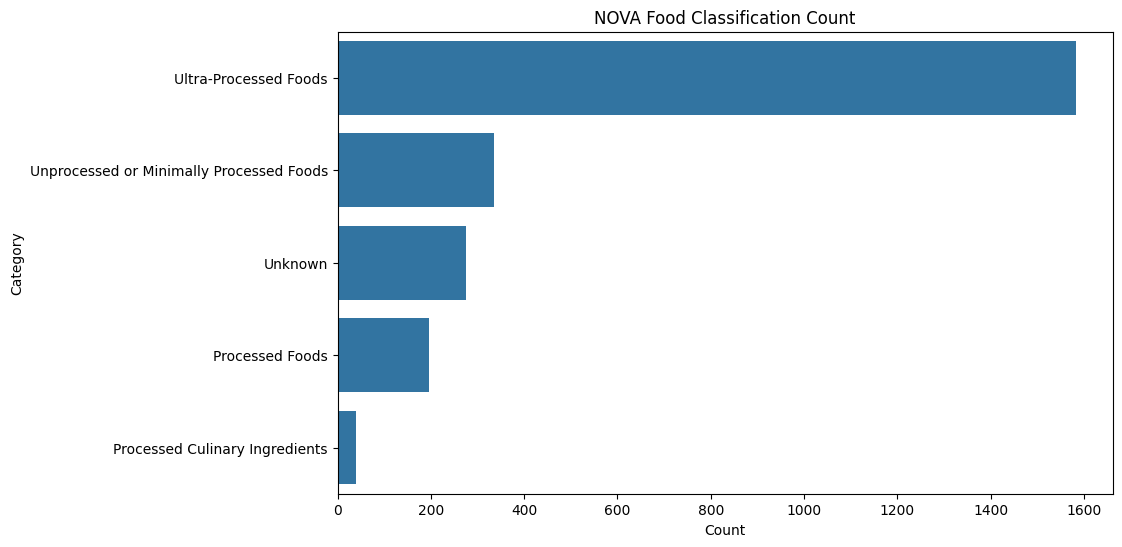

In [ ]:
# Visualize the classifications using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=food_list, order=food_list['Category'].value_counts().index)
plt.title('NOVA Food Classification Count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

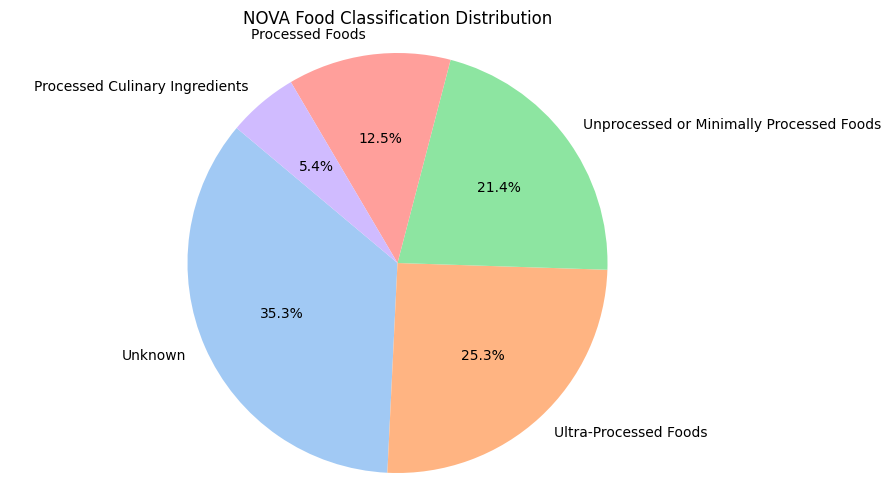

In [ ]:
# Visualize the classifications using pie chart
category_counts = food_list['Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('NOVA Food Classification Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

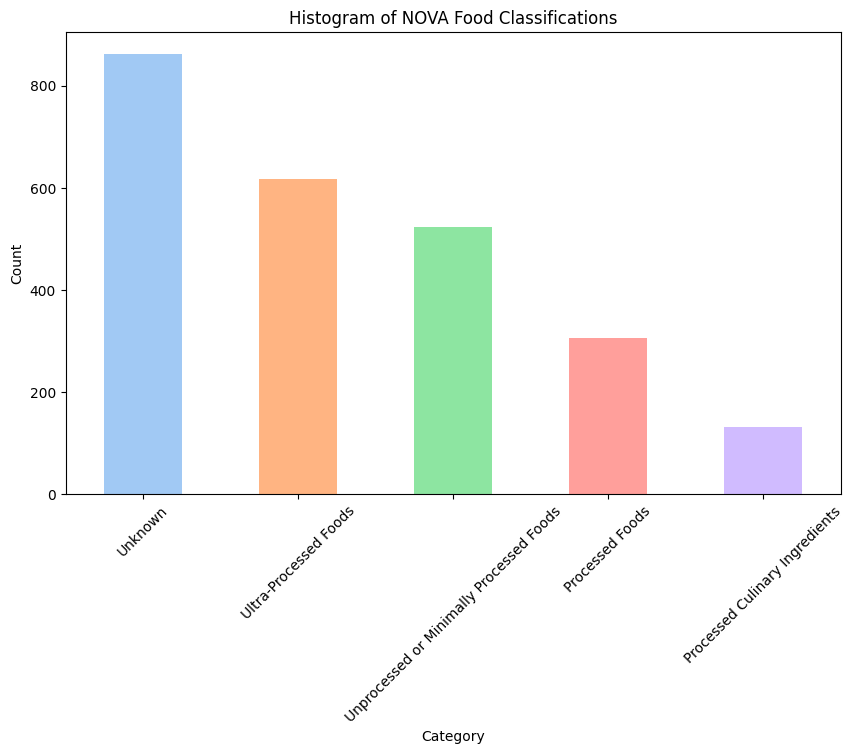

In [ ]:
# Visualize the classifications using a histogram
plt.figure(figsize=(10, 6))
food_list['Category'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Histogram of NOVA Food Classifications')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()